In [1]:
import torch
import esm 
import models 
import importlib 
import pandas as pd 
import os 
import numpy as np
import utils 
import torch.nn as nn
from tqdm import tqdm
from random import sample
importlib.reload(utils)
importlib.reload(models) 
from torch import optim
import re
import datautils
importlib.reload(datautils)
import pytorch_lightning as L
import torch.nn.functional as F
# from pytorch_lightning.strategies import DeepSpeedStrategy
importlib.reload(L)
strategy = L.strategies.DeepSpeedStrategy()
import torch.utils.tensorboard

[2024-06-24 11:25:43,622] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/tyfei/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.2
 [WARNING]  please install triton==1.0.0 if you want to use sparse attention


In [5]:
import yaml
a = {"train":{"epoch":15, "lr":5e-4, "step_lambda":True, "step":1.5}, "read":{"fix_layers":[1,2,3,4]}}
with open("./file.yaml", mode="wt", encoding="utf-8") as file:
    yaml.dump(a, file)
with open("./file.yaml") as f:
    b = yaml.safe_load(f)
b

{'read': {'fix_layers': [1, 2, 3, 4]},
 'train': {'epoch': 15, 'lr': 0.0005, 'step': 1.5, 'step_lambda': True}}

In [ ]:
%load_ext autoreload
%autoreload 2
import models 
import importlib 
importlib.reload(models)

In [2]:
a=1

In [1]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

In [2]:
import sys 
sys.path.append("/home/tyfei/fun/utils")
import VirusDataset 
import esm 
import random
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()

In [1]:
import sys

import torch

torch.set_float32_matmul_precision("medium")  # make lightning happy
# sys.path.append("/home/tyfei/fun/utils")

import pytorch_lightning as L
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.profilers import PyTorchProfiler

In [3]:
k = 2
pf = 2
checkpoint_callback = ModelCheckpoint(
    monitor="validate_acc",  # Replace with your validation metric
    mode="max",  # 'min' if the metric should be minimized (e.g., loss), 'max' for maximization (e.g., accuracy)
    save_top_k=k,  # Save top k checkpoints based on the monitored metric
    save_last=True,  # Save the last checkpoint at the end of training
    dirpath="/home/tyfei/ionChannel/ckpts/701pf2",  # Directory where the checkpoints will be saved
    filename="{pf}-{epoch}-{validate_acc:.2f}",  # Checkpoint file naming pattern
)
logger = TensorBoardLogger("tb_logs", name="ion_test")
trainer = L.Trainer(
    logger=logger,
    # strategy="DDP",
    accelerator="gpu",
    devices=[0],
    max_epochs=15,
    callbacks=[checkpoint_callback],
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [5]:
import esm

import VirusDataset

model, alphabet = esm.pretrained.esm2_t12_35M_UR50D()
batch_converter = alphabet.get_batch_converter()
import random

random.seed(1509)
torch.manual_seed(1509)

ds = VirusDataset.SeqdataModule()

import models

# model, alphabet = esm.pretrained.esm2_t12_35M_UR50D()
# batch_converter = alphabet.get_batch_converter()

clsmodel = models.ionclf(model, max_lambda=6, unfix=["11"])
trainer.validate(clsmodel, ds)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│            acc            │    0.5677664279937744     │
│      adversial loss       │    1.3970738649368286     │
│       predict loss        │     0.687456488609314     │
│       validate_acc        │    0.5677664279937744     │
│       validate_loss       │    0.8272002935409546     │
└───────────────────────────┴───────────────────────────┘

[{'predict loss': 0.687456488609314,
  'adversial loss': 1.3970738649368286,
  'acc': 0.5677664279937744,
  'validate_loss': 0.8272002935409546,
  'validate_acc': 0.5677664279937744}]

In [2]:
!head /home/tyfei/datasets/ion_channel/Interprot/ion_channel/0.99/IPR025692.fasta.0.99.fas

>A0A010SQC8|IPR025692(491...809)|Potassium transporter KefA
MPTLRSFFAIALLGLSLSVGSLQAAEPPSAETVQKSLDKIAERKLPEADQKALQLVLQQTLTQLSNRDDYEKRLNDLKQQ
LSTAPKQNIENQRELERLKASKAVPVEQRYANLSVPQLEQMLTERSTQQSDLQKALADANSLIITAQTRPERAQAEISTS
QTRILQINGILKLGRDNGKALTNEQRDTLNAELAALNALIPLRRQELAGNSQLQDLGNSQHDLLLEKTARMEREIQDLQT
LINQKRLAQSQQTVTQQSIEAQKAGGSNLLATESAANLKLSDYLLKSTDRLNELTQQNLQTKQQLDSVTQSDAALDEQIS
VLKGSLLLSKILYKQKQALPRLTLDRNLANDIADIRLYQFEVNQQRELISTPGAYVDNLLASQPPDQVTPQLRKNLLDLA
VTRADLLERLSRELSALLNESITLQLNQKQLLTTAQNLRATLDEQMFWIPSNKPLDFEWMRGVPDRLEKQVVTLPWASSL
SELADGLTQRPLLFLPLVLLIGFLVWRRKYLYARLNKVHQDIGHFKRDSQWHTPQAILINVLLAMPVSLALALCGFALQI
DARGQNANLGAALLQIAQAWLVFYTAYRILAPGGVAQLHFRWERPQVEFLRGWIRRLGLVVLALVAVVAVAELQPAALTD
DVIGIAVVLTCYALMAWLLSRLLINSPTHNSASLFRKAVGVLFTVLPIALFIAVCFGYFYTALKLSDRLINTLYLLMFWL


In [3]:
mapping = {'A': 0,'C': 1,'D': 2,'E': 3,'F': 4,'G': 5,'H': 6,'I': 7,'K': 8,
 'L': 9,'M': 10,'N': 11,'P': 12,'Q': 13,'R': 14,'S': 15,'T': 16,'V': 17,'W': 18,'Y': 19}
mapping.keys()

dict_keys(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])

In [4]:
model, alphabet = esm.pretrained.esm2_t12_35M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()
model.token_dropout

True

In [5]:
ion = models.ionclf(model, addadversial=False)
ion.fixParameters()

In [6]:
df = pd.read_excel("/home/tyfei/datasets/ion_channel/Interprot/Interprot-ion-channel-judgement.xls")
seqs = {}
for i in os.listdir("/home/tyfei/datasets/ion_channel/Interprot/ion_channel/0.99"):
    try:
        if i.endswith(".fas"):
            print(i, i[:i.find(".")] in df["Accession"].values)
            seqs[i[:i.find(".")]] = utils.readDataset("/home/tyfei/datasets/ion_channel/Interprot/ion_channel/0.99/"+i, 300, trunc=1198)
    except:
        print(i, "failed")

IPR025692.fasta.0.99.fas True
IPR003873.fasta.0.99.fas True
IPR005403.fasta.0.99.fas True
IPR003929.fasta.0.99.fas True
cd16972.fasta.0.99.fas True
IPR003972.fasta.0.99.fas True
IPR006859.fasta.0.99.fas True
IPR028746.fasta.0.99.fas True
PF17175.fasta.0.99.fas True
PF12795.fasta.0.99.fas True
IPR024393.fasta.0.99.fas True
cd01034.fasta.0.99.fas True
IPR015449.fasta.0.99.fas True
IPR028744.fasta.0.99.fas True
IPR049913.fasta.0.99.fas True
IPR028747.fasta.0.99.fas True
IPR003947.fasta.0.99.fas True
IPR003974.fasta.0.99.fas True
IPR000482.fasta.0.99.fas True
IPR044379.fasta.0.99.fas True
IPR003950.fasta.0.99.fas True
IPR011555.fasta.0.99.fas True
IPR016449.fasta.0.99.fas True
IPR029601.fasta.0.99.fas True
cd18415.fasta.0.99.fas True
IPR003272.fasta.0.99.fas True
TIGR00862.fasta.0.99.fas True
IPR008132.fasta.0.99.fas True
cd15241.fasta.0.99.fas True
IPR001185.fasta.0.99.fas True
IPR024587.fasta.0.99.fas True
IPR044377.fasta.0.99.fas True
IPR010291.fasta.0.99.fas True
IPR005404.fasta.0.99.f

In [7]:
seqs["negative"] = utils.readDataset("/home/tyfei/datasets/ion_channel/Interprot/Negative_sample/decoy_1m_new.fasta", 40000, 1200)

In [8]:
filtered = []
labels = [] 

for i, tt in seqs.items():
    if i == "negative":
        labels.extend([0]*len(tt))
    else:
        labels.extend([1]*len(tt))
    for name, seq in tt:
        if "*" in seq:
            filtered.append((name, seq[:-1].upper()))
        else:
            filtered.append((name, seq.upper()))

In [9]:
len(labels), sum(labels)

(93404, 53404)

In [10]:
batch_labels, _, batch_tokens = batch_converter(filtered)

In [11]:
allvirus = []
for i in os.listdir("/home/tyfei/datasets/NCBI_virus/genbank_csv/"):
    df = pd.read_csv("/home/tyfei/datasets/NCBI_virus/genbank_csv/"+i)
    for j in df["translation"]:
        seq = re.sub("[^a-z,A-Z]", "", str(j)) 
        if len(seq) < 10:
            continue
        if "J" in seq:
            continue
        if len(seq) > 1200:
            seq = seq[:1200]
        allvirus.append(("1", seq))
len(allvirus)

678139

In [12]:
allvirus = allvirus[:30000]

In [13]:
batch_labels2, _, batch_tokens2 = batch_converter(allvirus)

In [14]:
batch_tokens2.shape

torch.Size([30000, 1202])

In [15]:
# i = sample(range(batch_tokens2.shape[0]), len(batch_tokens))
trainset = datautils.SeqDataset2(batch_tokens, labels, batch_tokens2)

/home/tyfei/ionChannel/datautils.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.seq = torch.tensor(seq).long()
/home/tyfei/ionChannel/datautils.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.seqtest = torch.tensor(seqtest).long()


In [16]:
testset  = datautils.TestDataset(batch_tokens2)

/home/tyfei/ionChannel/datautils.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.seq = torch.tensor(seq).long()


In [17]:
ds = datautils.SeqdataModule(trainset, testset, batch_size=12)

In [18]:
trainer = L.Trainer(
        # strategy="ddp",
        devices=[1],
        min_epochs=1,
        max_epochs=5)
trainer.fit(ion, ds)

GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/tyfei/anaconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/home/tyfei/anaconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.
/home/tyfei/anaconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
`Trainer.fit` stopped: `max_epochs=5` reached.


In [9]:
ds = utils.SeqDataset(batch_tokens, labels)

/home/tyfei/ionChannel/utils.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.seq = torch.tensor(seq).long()


In [10]:
trainloader, valloader = utils.splitDataset(ds)

In [44]:
torch.cuda.memory_allocated("cuda:2")

17538681344

: 

In [14]:
# [i for i in filter(lambda p:p.requires_grad, ion.parameters())]
for i, j in ion.named_parameters():
    if j.requires_grad:
        print(i, j)
    # print(i, j.requires_grad)

esm_model.layers.9.self_attn.k_proj.weight Parameter containing:
tensor([[-0.0335,  0.0458, -0.0815,  ..., -0.0226, -0.0247, -0.0179],
        [ 0.0969, -0.1143,  0.1702,  ...,  0.0959, -0.0573,  0.1472],
        [ 0.0635, -0.0958, -0.1116,  ..., -0.0831,  0.0536,  0.0624],
        ...,
        [-0.1055,  0.0552,  0.1266,  ..., -0.0116, -0.0106, -0.0596],
        [ 0.0890, -0.0312, -0.1110,  ..., -0.1038, -0.0019,  0.0107],
        [-0.1689, -0.0557, -0.0856,  ..., -0.0821,  0.0670,  0.1293]],
       requires_grad=True)
esm_model.layers.9.self_attn.k_proj.bias Parameter containing:
tensor([-1.0323e-02, -4.9219e-01,  1.7517e-01, -1.0437e-01, -1.6904e+00,
         2.5996e+00,  2.7695e+00, -6.0195e+00,  4.7266e-01, -1.9385e+00,
        -1.1455e+00,  7.6709e-01,  8.9990e-01,  1.8384e-01,  5.8057e-01,
         1.0752e+00, -2.4304e-01, -5.8252e-01,  2.0293e+00,  5.3076e-01,
         2.6392e-01, -3.8354e-01,  1.2659e-01,  5.0244e-01, -2.3453e-02,
        -1.8494e-02,  1.1517e-01, -3.2318e-02,

In [59]:
target = torch.rand(3, 2, requires_grad=False)
target

tensor([[0.4999, 0.5560],
        [0.5555, 0.4149],
        [0.4432, 0.0545]])

In [15]:
device = "cuda:0"
ion.train() 
ion = ion.to(device)
optimizer = optim.Adam(filter(lambda p:p.requires_grad, ion.parameters()), lr=0.005)
bce = nn.BCELoss()
for epoch in range(2):
    pbar = tqdm(trainloader)
    for i, (s, labels) in enumerate(pbar):
        s = s.to(device)
        labels = labels.to(device)
        pre = ion(s) 
        loss = bce(pre.squeeze(), labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_postfix(bce=loss.item())
    torch.save(model.state_dict(), "./checkpoints/try606/%d.pt"%epoch)

100%|██████████| 4671/4671 [32:40<00:00,  2.38it/s, bce=0.623] 


In [20]:
device = "cuda:2"
ion.eval() 
predict = [] 
truth = [] 
valloader = ds.val_dataloader()
with torch.no_grad():
    ion = ion.to(device)
    for i, (s, labels, _) in tqdm(enumerate(valloader)):
        s = s.to(device) 
        truth.append(labels)
        pre, _ = ion(s) 
        predict.append(pre.squeeze().cpu().numpy()) 
predict = np.concatenate(predict, axis=0)
truth = np.concatenate(truth, axis=0)

1557it [05:48,  4.47it/s]


In [22]:
from sklearn.metrics import classification_report
predict_label = (predict>0.5).astype(int) 
print(classification_report(truth, predict_label, target_names=["non-ion", "ion"]))

              precision    recall  f1-score   support

     non-ion       0.97      0.93      0.95      7905
         ion       0.95      0.98      0.96     10775

    accuracy                           0.95     18680
   macro avg       0.96      0.95      0.95     18680
weighted avg       0.96      0.95      0.95     18680



In [74]:
seqs = {}
seqs["virus_seq"] = utils.readDataset("/home/tyfei/datasets/ion_channel/Known_Virus_Ion_pro/all_Known_Virus_Ion_pro.rename_0.99.fasta", trunc=1200)
filtered = []
labels = [] 

for i, tt in seqs.items():
    labels.extend([i]*len(tt))
    for name, seq in tt:
        if "*" in seq:
            filtered.append((name, seq[:-1].upper()))
        else:
            filtered.append((name, seq.upper()))

In [76]:
batch_labels, _, batch_tokens = batch_converter(filtered) 
allres = []
batch_tokens = batch_tokens.to("cuda:0")
for i in tqdm(range(0,len(batch_tokens), 10)):
    with torch.no_grad():
        results = model(batch_tokens[i:i+10])
        # token_representations = results["representations"][12].cpu().numpy()
        allres.append(pre.squeeze().cpu().numpy())
allres = np.concatenate(allres, axis=0)

100%|██████████| 37/37 [00:06<00:00,  5.44it/s]


(array([111.,  37.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 148.]),
 array([3.06374772e-04, 1.00096077e-01, 1.99885786e-01, 2.99675494e-01,
        3.99465173e-01, 4.99254882e-01, 5.99044561e-01, 6.98834300e-01,
        7.98623979e-01, 8.98413718e-01, 9.98203397e-01]),
 <BarContainer object of 10 artists>)

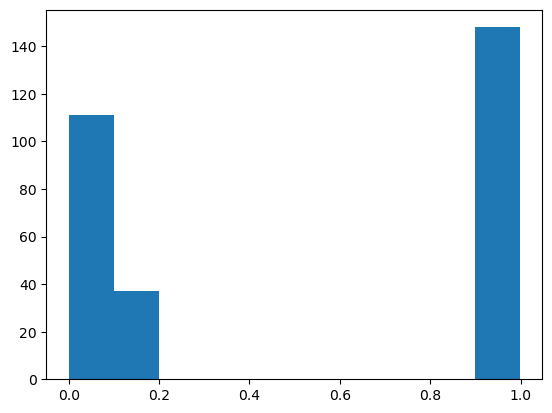

In [78]:
allres
import matplotlib.pyplot as plt
plt.hist(allres)